該 import 的東西都差不多 import 完了，所以可以直接複製這個檔案作為開頭 section，直接開始後面的分析。

In [1]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## Data Processing

In [31]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
0,4234,Scream 3,40000000,"['Horror', 'Mystery']",en,"['Craven-Maddalena Films', 'Dimension Films', ...",2000-02-03,NaN,161834276,116,...,R,37.0,驚聲尖叫3：終結篇,Scream Collection,0,1,1,0,2000,2
1,1907,The Beach,40000000,"['Drama', 'Adventure', 'Romance', 'Thriller']",en,['Figment Films'],2000-02-03,NaN,144056873,119,...,R,57.0,海灘,NaN,0,0,1,0,2000,2
2,15655,The Tigger Movie,30000000,"['Family', 'Animation', 'Comedy']",en,"['Disney Television Animation', 'DisneyToon St...",2000-02-11,NaN,45554533,77,...,G,62.0,跳跳虎歷險記,NaN,1,0,1,0,2000,2
3,14181,Boiler Room,7000000,"['Crime', 'Drama', 'Thriller']",en,['New Line Cinema'],2000-02-18,NaN,28780255,118,...,R,78.0,搶錢大作戰,NaN,0,0,1,0,2000,2
4,2069,The Whole Nine Yards,41300000,"['Comedy', 'Crime']",en,"['Franchise Pictures', 'Morgan Creek Productio...",2000-02-18,NaN,106371651,98,...,R,64.0,殺手不眨眼,The Whole Nine/Ten Yards Collection,0,1,1,0,2000,2


,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3167,460465,Mortal Kombat,20000000,"['Action', 'Fantasy', 'Adventure']",en,"['Atomic Monster', 'Broken Road Productions', ...",2021-04-07,NaN,76706000,110,...,R,86.0,真人快打,NaN,1,0,0,1,2021,4
3168,637649,Wrath of Man,40000000,"['Action', 'Crime']",en,"['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...",2021-04-22,2021-04-29T00:00:00.000Z,80648577,119,...,R,91.0,玩命鈔劫,NaN,1,0,0,1,2021,4
3169,520663,The Woman in the Window,4000000,"['Crime', 'Mystery', 'Thriller']",en,"['Fox 2000 Pictures', 'Scott Rudin Productions...",2021-05-14,NaN,0,102,...,R,36.0,窺探,NaN,1,0,0,1,2021,5
3170,503736,Army of the Dead,90000000,"['Action', 'Horror', 'Thriller']",en,['The Stone Quarry'],2021-05-14,NaN,780000,148,...,NaN,NaN,活屍大軍,Army of the Dead Collection,1,1,0,1,2021,5
3171,337404,Cruella,200000000,"['Comedy', 'Crime']",en,['Walt Disney Pictures'],2021-05-26,NaN,46586903,134,...,PG-13,97.0,時尚惡女：庫伊拉,Cruella Collection,1,1,0,1,2021,5


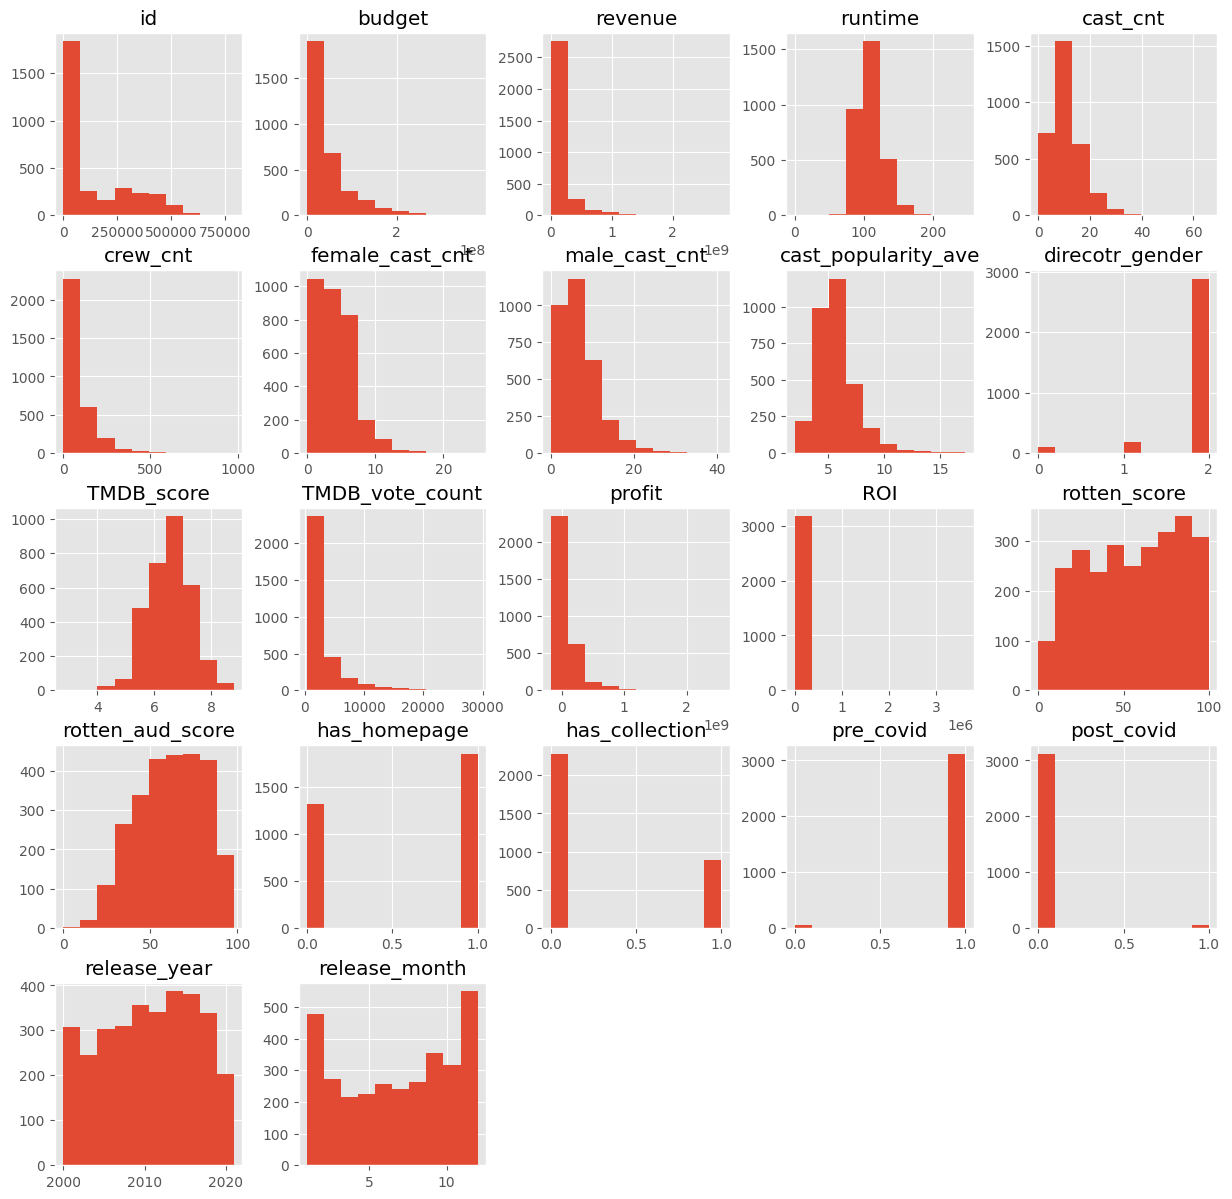

In [32]:
movie_df.hist(figsize=(15, 15))
plt.show()

可以看出裡面有需多 outliers，這些 data points 很可能影響到整體結果，所以我們將不考慮這些電影的計算。

在這邊，我們也可以看到 "revenue"、"budget"、"ROI" 這三個重點項目都不是常態分佈，要做分析的話會有點困難。這時候，我們可以採用 `np.log1p()` 來做 data transformation。如要要做預測的話，則是用 `np.exp1p()` 來還原。這部分，會在去除玩異質之後統一處理。

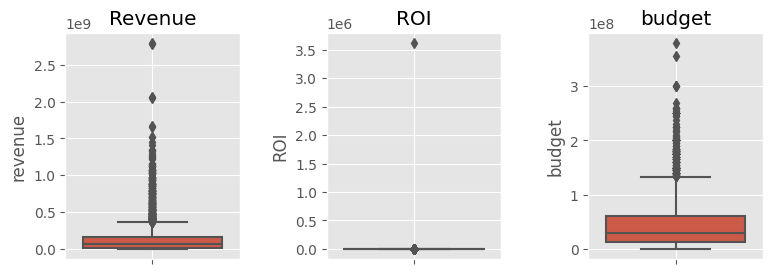

In [53]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>你知道嗎？</b> 票房最高的電影是 2019 年上映的復仇者聯盟：終局之戰。</div>

In [41]:
movie_df[movie_df['revenue'] == movie_df['revenue'].max()]

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3005,299534,Avengers: Endgame,356000000,"['Adventure', 'Science Fiction', 'Action']",en,['Marvel Studios'],2019-04-24,2019-04-24T00:00:00.000Z,2797800564,181,...,PG-13,90.0,復仇者聯盟：終局之戰,The Avengers Collection,1,1,1,0,2019,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

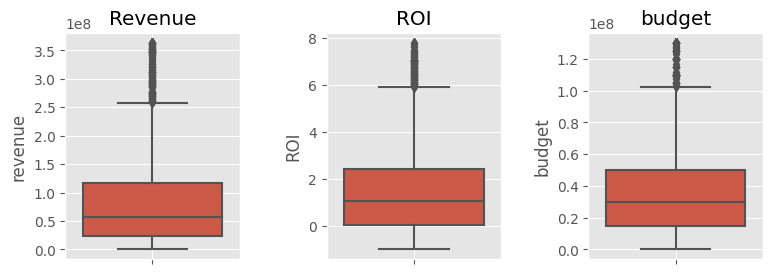

(2248, 33)


In [76]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

這明顯已經較上面所看到的 box plots 好上許多。因此我們便用剩下的 2248 筆資料進行更近一步的分析。另外，在這邊也要注意到，不是所有的 column 都是 2248 筆資料，有些 data 是有少的。所以在做分析時要格外小心。

In [77]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

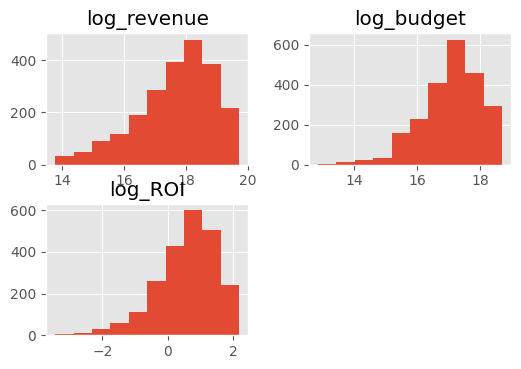

In [78]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

## Data Analysis

## 九、票房預測
動機：經過前述各種變數的分析，我們希望可以找出對於票房有影響力的變數組合，並試著預測有哪些特質的電影會有比較好的票房。<br>
我們曾嘗試採用 time-series regression model 但成效並不好，因為期數每年都不太一樣（可以見下面 Time Series 部分），所以最後依舊選擇複迴歸模型進行預測。

In [107]:
regression_df = u_movie_df[(u_movie_df['release_date'] > datetime(2010, 1, 1)) & (u_movie_df['release_date'] < datetime(2019, 12, 31))].copy().reset_index(drop=True)

In [108]:
regression_df['cast_popularity_ave'] = regression_df.cast_popularity_ave.fillna(regression_df.cast_popularity_ave.mean())
regression_df['rotten_score'] = regression_df['rotten_score'].fillna(regression_df['rotten_score'].mean())
regression_df['rotten_aud_score'] = regression_df['rotten_aud_score'].fillna(regression_df['rotten_aud_score'].mean())

In [109]:
x_names = ['budget', 'runtime', 'cast_cnt', 'crew_cnt', 'female_cast_cnt',
       'male_cast_cnt',  'TMDB_score', 'TMDB_vote_count', 'has_homepage', 'has_collection', 'cast_popularity_ave', 'rotten_score', 'rotten_aud_score']
y_name = 'revenue'

In [110]:
regression_df.shape

(1514, 36)

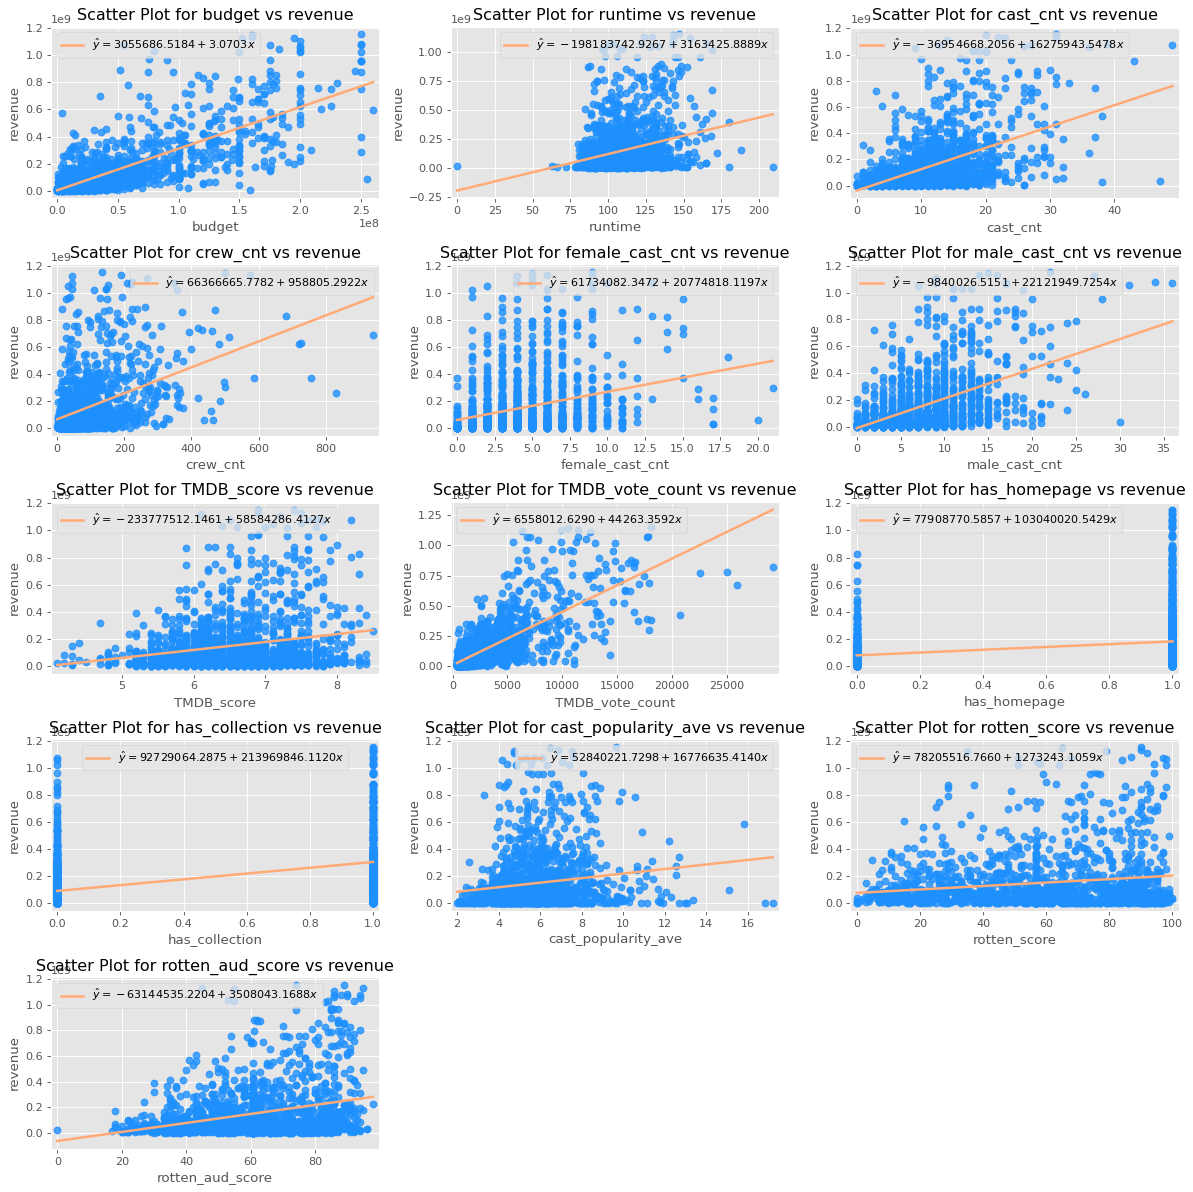

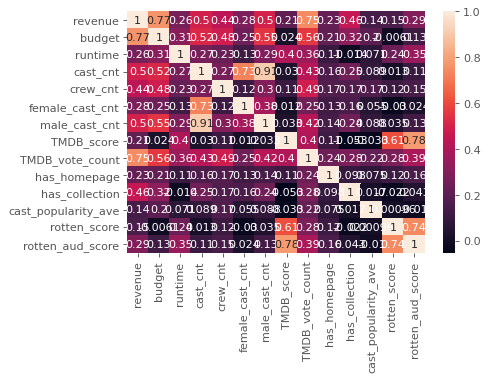

In [111]:
mgt2001.model.multi_scatter_plot(5, 3, regression_df, x_names, y_name, figsize=(15, 15)) # correlation table included

在下方的dataframe我們可以看到regression與['budget', 'runtime', 'cast_cnt', 'crew_cnt', 'female_cast_cnt', 'male_cast_cnt',  'TMDB_score', 'TMDB_vote_count', 'cast_popularity_ave', 'rotten_score', 'rotten_aud_score'] 這些變數有正向線性關係。

In [112]:
mgt2001.model.multicollinearity(regression_df, x_names, y_name)

,revenue,budget,runtime,cast_cnt,crew_cnt,female_cast_cnt,male_cast_cnt,TMDB_score,TMDB_vote_count,has_homepage,has_collection,cast_popularity_ave,rotten_score,rotten_aud_score
revenue,1.000000,0.765619,0.264829,0.497190,0.436268,0.281785,0.501433,0.209780,0.748879,0.225778,0.455447,0.144059,0.152821,0.288583
budget,0.765619,1.000000,0.309445,0.519841,0.482312,0.245096,0.553914,0.024463,0.562417,0.213661,0.322544,0.198903,-0.006060,0.127460
runtime,0.264829,0.309445,1.000000,0.269881,0.228017,0.127320,0.287525,0.402429,0.357162,0.107467,-0.014167,0.071164,0.238099,0.347594
cast_cnt,0.497190,0.519841,0.269881,1.000000,0.271317,0.728081,0.911997,0.029799,0.425316,0.163572,0.249845,0.089181,0.012507,0.108507
crew_cnt,0.436268,0.482312,0.228017,0.271317,1.000000,0.117649,0.295247,0.111065,0.485268,0.170075,0.167663,0.169040,0.115027,0.148725
female_cast_cnt,0.281785,0.245096,0.127320,0.728081,0.117649,1.000000,0.382820,0.011706,0.254605,0.130993,0.157882,0.054579,-0.029827,0.023904
male_cast_cnt,0.501433,0.553914,0.287525,0.911997,0.295247,0.382820,1.000000,0.033155,0.420834,0.142057,0.242235,0.087527,0.034704,0.131928
TMDB_score,0.209780,0.024463,0.402429,0.029799,0.111065,0.011706,0.033155,1.000000,0.399971,0.114755,-0.052996,-0.032605,0.610450,0.784524
TMDB_vote_count,0.748879,0.562417,0.357162,0.425316,0.485268,0.254605,0.420834,0.399971,1.000000,0.242561,0.279409,0.220179,0.277466,0.389179
has_homepage,0.225778,0.213661,0.107467,0.163572,0.170075,0.130993,0.142057,0.114755,0.242561,1.000000,0.097774,0.075398,0.119720,0.155257


於是我們使用 stepwise regression 來做預測，看看是否能避開多元共線性的問題。

In [113]:
stepwise_res_dict = mgt2001.model.stepwise_selection(df =regression_df, y_name = y_name, x_names = x_names, verbose=False)

======= Stepwise Regression Selection =======
Stop after 13 iterations.

Best adjR2 =  0.7730319697104591
Best subset =  ['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score', 'runtime', 'cast_popularity_ave', 'cast_cnt', 'crew_cnt', 'female_cast_cnt']

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     573.6
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:05:01   Log-Likelihood:                -30022.
No. Observations:                1514   AIC:                         6.006e+04
Df Residuals:                    1504   BIC:                         6.012e+04
Df Model:                           9                                         
Covariance Type:      

根據 model 的係數，我們可以發現在 'cast_popularity_ave', 'runtime', 'crew-cnt', 'male_cast_cnt' 的正負號與相關係數的正負號不同，因此多元共線性的問題仍然存在。<br>
我們繼續嘗試其他不同的方法來解決多元共線性問題。

**Fix Multicollinearity**

經過多組測試，曾經嘗試使用 Data Transformation、best subset⋯⋯等方法效果皆不如預期，最後決定直接刪除具有 multicollinearity problem 的項目，意外發現此成效最好

dependent variables(y): 'revenue'<br>
independent variables(x): 'budget'(x1), 'TMDB_vote_count'(x2), 'has_collection'(x3), 'rotten_aud_score(x4)', 'cast_cnt'(x5).


其中，indicator variables為'has_collection'.

In [114]:
new_x_names = stepwise_res_dict['best_subset'].copy()
new_x_names.remove('crew_cnt')
new_x_names.remove('cast_popularity_ave')
new_x_names.remove('runtime')
try:
    new_x_names.remove('male_cast_cnt')
except:
    pass
try:
    new_x_names.remove('female_cast_cnt')
except:
    pass

# new_x_names.remove('rotten_score')
# new_x_names.append('Time')
new_x_names

['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score', 'cast_cnt']

In [115]:
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=new_x_names, 
                                                        y_name=y_name, 
                                                        df=regression_df, 
                                                        assessment=False, 
                                                        t_test_c=0, 
                                                        t_test_option='two-tail')

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1002.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:05:01   Log-Likelihood:                -30041.
No. Observations:                1514   AIC:                         6.009e+04
Df Residuals:                    1508   BIC:                         6.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.764e+07   1.07e+07  

此model解決了多元共線性的問題，因此繼續往下做各項分析。

接著，在進一步檢驗這個模型的解釋力前我們要確認其殘差分析滿足下列三個條件：

1. Non-normality (常態性)
2. Heteroscedasticity and homoscedasticity (變異數同質性)
3. Non-independence of the error variable (獨立性)

For the first condition, the hypotheses are as follows:

+ $H_0$: The errors are normally distributed
+ $H_1$: The errors are not normally distributed

For the second condition, the hypotheses are:

+ $H_0$: The residuals are of constant variance (Homoscedasticity)
+ $H_1$: The residuals are not of constant variance (Heteroscedasticity)

For the third condition, the hypotheses are:

+ $H_0$: Randomness exists
+ $H_1$: Randomness does not exist

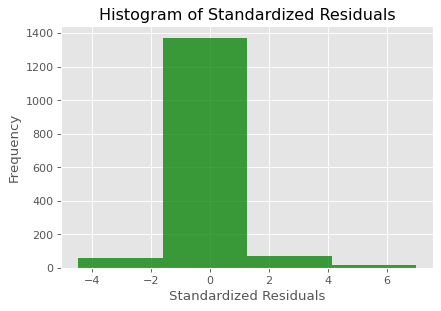

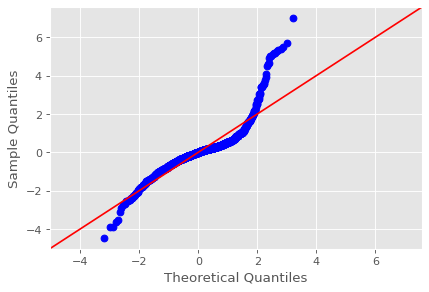

In [116]:
mu_3 = np.mean(res_dict['std_resid'])
sigma_3 = np.std(res_dict['std_resid'])
k_3 = res_dict['df_result'].df_model
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(res_dict['std_resid'], 4, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)
bin_centers = [np.mean(k_3) for k_3 in zip(bins[:-1], bins[1:])]
plt.show()
fig = sm.qqplot(res_dict['std_resid'], stats.norm, fit=True, line='45')

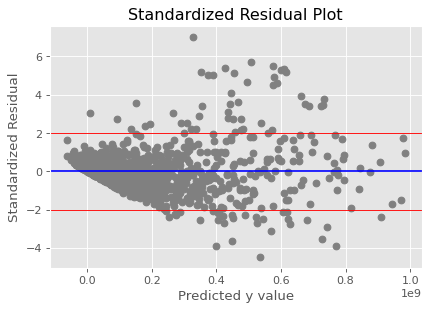

In [117]:
plt.plot(res_dict['y_pre'], res_dict['std_resid'], 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

In [118]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [119]:
import statistics
SD_median_3 = statistics.median(res_dict['std_resid'])
Z_pval_3 = runsTest(res_dict['std_resid'], SD_median_3) 
print('p_value for Z-statistic= ', Z_pval_3)

runs =  751
n1 =  757
n2 =  757
runs_exp =  758.0
stan_dev =  19.44864609080454
z =  -0.35992222632451776
pval_z =  0.7189052951823381
p_value for Z-statistic=  0.7189052951823381


根據長條圖及qqplot的結果，我們可以暫時假設其殘差為常態分佈。

針對第二個條件，從上面殘差的分佈圖，我們無法拒絕虛無假設，並認定殘差具有同方差性（Homoscedasticity）。

而第三個條件的p值 $= 0.7189> \alpha = 0.05$. 我們無法拒絕虛無假設，並認定取樣是隨機的。

+ The Standard Error of Estimate  
    The $s_\epsilon = 100474639.1618$ 和$y$的平均比較起來 ($\bar y =  150390687.2820$)， $s_\epsilon$ 並沒有比較小。因此這個模型並沒有太好的貼合資料。
+ The Coefficient of Determination  
    + $r^2 = 0.7686$ ，代表 76.86% $y$ 的變異可以被這個回歸模型解釋。剩餘的23.14%無法被解釋。
    + 調整後的 $r^2$ is $0.7678$，和 $r^2$的差距小於6%，代表這個模型沒有over-fitting的問題。
+ The $F$-test of ANOVA  
    $F$-test的$p$值 $=0.0000 < \alpha = 0.05$，因此我們可以拒絕虛無假設。代表至少有一個變數的係數不等於0，代表這個模型是**有效的**。
+ Testing of the Coefficients  
    + $H_0$: $\beta_i = 0$ 
    + $H_1$: $\beta_i \neq 0$
    + $i$ =1,2,3,4,5

In [120]:
for x, p in zip(new_x_names, res_dict['df_result'].pvalues[1:]):
    print("p-value of %s = %0.3f" % (x, p))
    if p < 0.05:
        print("  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.")
        print("  There is enough evidence to infer that %s is linearly related to monthly sales.\n" %x)
    else:
        print("  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.")
        print("  There is not enough evidence to infer that %s is linearly related to monthly sales.\n" %x)

p-value of budget = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that budget is linearly related to monthly sales.

p-value of TMDB_vote_count = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that TMDB_vote_count is linearly related to monthly sales.

p-value of has_collection = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that has_collection is linearly related to monthly sales.

p-value of rotten_aud_score = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that rotten_aud_score is linearly related to monthly sales.

p-value of cast_cnt = 0.010
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that cast_

我們得到的模型為：

$$
ŷ = -97643508.4111 + 1.8114 x_1 + 23805.2576 x_2 + 86918589.9428 x_3 + 755207.4222 x_4 + 1247804.2424 x_5 
$$

+ $b_0 = -97643508.4111$: 當所有的變數皆為0時$y$的截距。但在所有的資料中並不包含這個範圍，因此不解讀截距的意義。
+ $b_1 = 1.8114$:在這個模型中，預算每多一美金，票房會成長\$1.8114 (在其他變數維持不變的前提下)。
+ $b_2 = 23805.2576$: 在這個模型中，TMDB_vote_count每多一單位，票房會成長\$23805.2576 (在其他變數維持不變的前提下)。
+ $b_3 = 86918589.9428$: 在這個模型中，如果有collection的話，票房會成長\$86918589.9428 (在其他變數維持不變的前提下)。 
+ $b_4 = 755207.4222$: 在這個模型中，rotten_aud_score每多一分，票房就會成長\$755207.4222 (在其他變數維持不變的前提下)。
+ $b_5 = 1247804.2424$: 在這個模型中，演員數每多一名，票房就會成長\$1247804.2424 (在其他變數維持不變的前提下)。

##### 如果去掉 Outliers 的結果會如何？

In [121]:
regression_df[y_name]

0        29922472
1       157107755
2        33583175
3       112462508
4        45236543
          ...    
1509     17133446
1510     73515024
1511    191540586
1512     50401502
1513    374733942
Name: revenue, Length: 1514, dtype: int64

dependent variables(y): 'revenue'<br>
independent variables(x): 'budget'(x1), 'TMDB_vote_count'(x2), 'has_collection'(x3), 'rotten_aud_score(x4)'

has_collection is indicator variable.

In [122]:
standard_resid = res_dict['std_resid']
x_data = regression_df[new_x_names].to_numpy()
y_data = regression_df[y_name]
outlier_index, infobs_index = mgt2001.team.Outlier_and_InfObs (standard_resid=standard_resid, x_data=x_data, y_data=y_data, Multi = True, df=regression_df)

outlier_index = np.array(outlier_index)
infobs_index = np.array(infobs_index)

outlier_infobs = np.concatenate([outlier_index, infobs_index])
outlier_infobs = list(dict.fromkeys(outlier_infobs))
# print(outlier_infobs)
regression_df = regression_df.drop(index=outlier_infobs)

regression_df = regression_df.reset_index()
regression_df = regression_df.drop(columns=['index'])

new_x_names.remove('cast_cnt') #since multicollinearity problem

res_dict_new, assessment_new = mgt2001.model.MultipleRegression(x_names=new_x_names, 
                                                        y_name=y_name, 
                                                        df=regression_df, 
                                                        assessment=False, 
                                                        t_test_c=0, 
                                                        t_test_option='two-tail')



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1533.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:05:02   Log-Likelihood:                -26863.
No. Observations:                1389   AIC:                         5.374e+04
Df Residuals:                    1384   BIC:                         5.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.274e+07   6.33e+06

接著，在進一步檢驗這個模型的解釋力前我們要確認其殘差分析滿足下列三個條件：

1. Non-normality (常態性)
2. Heteroscedasticity and homoscedasticity (變異數同質性)
3. Non-independence of the error variable (獨立性)

For the first condition, the hypotheses are as follows:

+ $H_0$: The errors are normally distributed
+ $H_1$: The errors are not normally distributed

For the second condition, the hypotheses are:

+ $H_0$: The residuals are of constant variance (Homoscedasticity)
+ $H_1$: The residuals are not of constant variance (Heteroscedasticity)

For the third condition, the hypotheses are:

+ $H_0$: Randomness exists
+ $H_1$: Randomness does not exist

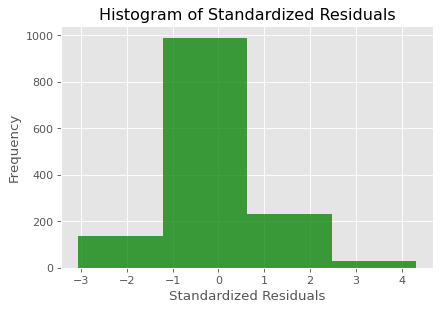

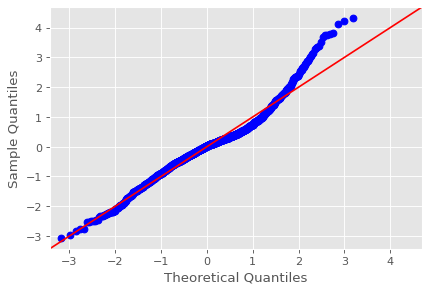

In [123]:
mu_3 = np.mean(res_dict_new['std_resid'])
sigma_3 = np.std(res_dict_new['std_resid'])
k_3 = res_dict_new['df_result'].df_model
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(res_dict_new['std_resid'], 4, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)
bin_centers = [np.mean(k_3) for k_3 in zip(bins[:-1], bins[1:])]
plt.show()
fig = sm.qqplot(res_dict_new['std_resid'], stats.norm, fit=True, line='45')

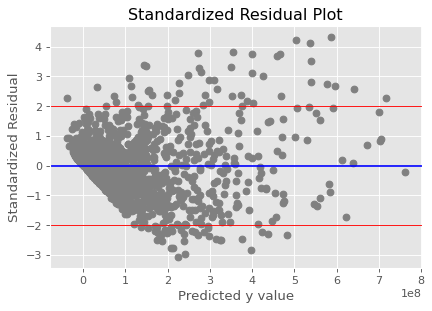

In [124]:
plt.plot(res_dict_new['y_pre'], res_dict_new['std_resid'], 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

In [125]:
SD_median_3 = statistics.median(res_dict_new['std_resid'])
Z_pval_3 = runsTest(res_dict_new['std_resid'], SD_median_3) 
print('p_value for Z-statistic= ', Z_pval_3)

runs =  699
n1 =  695
n2 =  694
runs_exp =  695.4996400287977
stan_dev =  18.627921513513453
z =  0.18790931498519708
pval_z =  0.850947740513232
p_value for Z-statistic=  0.850947740513232


根據長條圖及qqplot的結果，我們可以假設其殘差為常態分佈。

針對第二個條件，從上面殘差的分佈圖，我們無法拒絕虛無假設，並認定殘差具有同方差性（Homoscedasticity）。

而第三個條件的p值 $= 0.8509> \alpha = 0.05$. 我們無法拒絕虛無假設，並認定取樣是隨機的。

+ The Standard Error of Estimate  
    The $s_\epsilon = 59949741.3693$ 和$y$的平均比較起來 ($\bar y =  113392305.8323$)， $s_\epsilon$ 並沒有比較小。因此這個模型並沒有太好的貼合資料。
+ The Coefficient of Determination  
    + $r^2 = 0.816$ ，代表 81.6% $y$ 的變異可以被這個回歸模型解釋。剩餘的18.4%無法被解釋。
    + 調整後的 $r^2$ is $0.815$，和 $r^2$的差距小於6%，代表這個模型沒有over-fitting的問題。
+ The $F$-test of ANOVA  
    $F$-test的$p$值 $=0.0000 < \alpha = 0.05$，因此我們可以拒絕虛無假設。代表至少有一個變數的係數不等於0，代表這個模型是**有效的**。
+ Testing of the Coefficients  
    + $H_0$: $\beta_i = 0$ 
    + $H_1$: $\beta_i \neq 0$
    + $i$=1,2,3,4

In [126]:
for x, p in zip(new_x_names, res_dict_new['df_result'].pvalues[1:]):
    print("p-value of %s = %0.3f" % (x, p))
    if p < 0.05:
        print("  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.")
        print("  There is enough evidence to infer that %s is linearly related to monthly sales.\n" %x)
    else:
        print("  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.")
        print("  There is not enough evidence to infer that %s is linearly related to monthly sales.\n" %x)

p-value of budget = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that budget is linearly related to monthly sales.

p-value of TMDB_vote_count = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that TMDB_vote_count is linearly related to monthly sales.

p-value of has_collection = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that has_collection is linearly related to monthly sales.

p-value of rotten_aud_score = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that rotten_aud_score is linearly related to monthly sales.



我們得到的模型為：

$$
ŷ = -62743630.3927 + 1.7131 x_1 + 22486.4149 x_2 + 71625474.3703 x_3 + 477437.8165 x_4
$$

+ $b_0 = -62743630.3927$: 當所有的變數皆為0時$y$的截距。但在所有的資料中並不包含這個範圍，因此不解讀截距的意義。 
+ $b_1 = 1.7131$: 在這個模型中，預算每多一美金，票房會成長\$1.7131 (在其他變數維持不變的前提下)。
+ $b_2 = 22486.4149$: 在這個模型中，TMDB_vote_count每多一單位，票房會成長\$22486.4149 (在其他變數維持不變的前提下)。
+ $b_3 = 71625474.3703 $: 在這個模型中，如果有collection的話，票房會成長\$71625474.3703 (在其他變數維持不變的前提下)。 
+ $b_4 = 477437.8165$: 在這個模型中，rotten_aud_score每多一分，票房就會成長\$477437.8165 (在其他變數維持不變的前提下)。

接著利用此 model 進行預測，預測2020/1的電影票房。

In [127]:
#['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score']
real_revenue = np.array([245692007,42800000,40882928,26925979,18472775,1023510,22059211])
x_pre = np.array([[1, 175000000, 2540, 0, 76],#Dolittle
                  [1, 10000000, 801, 0, 23], #The Grudge
                  [1, 80000000, 2076, 0, 60], #Underwater
                  [1, 29000000, 482, 0, 65], #Like a Boss
                  [1, 14000000, 643, 0, 15], #The Turning
                  [1, 6000000, 737, 0, 82], #Color Out of Space
                  [1, 5000000, 944, 0, 23]]) #Gretel & Hansel

y_pre = res_dict_new['df_result'].predict(x_pre)
print('prediction revenue: ', y_pre)
gap = np.absolute(real_revenue-y_pre)/real_revenue
print('gap: ', gap)
print('average gap: ', gap.sum()/7)

prediction revenue:  [ 3.30448696e+08 -1.66199961e+07  1.49632005e+08  2.88080236e+07
 -1.71399737e+07  3.25732605e+06 -2.19699119e+07]
gap:  [0.34497129 1.38831767 2.66001196 0.06989698 1.92785051 2.18250535
 1.99595184]
average gap:  1.5099293705639918


因為 female_cast_cnt 與 male_cast_cnt 與 cast_cnt 會有多元共線性的問題，加上顯著度不高，於是我們選擇刪除這些變數。  

<div class="alert alert-block alert-danger">
    
    <b>錯誤更正：</b><br>
    <p>
關於 Gap 的部分，由於我們一開始採取簡單平均法，導致正負差值抵銷，算出比較低的平均。在檢查後發現加絕對值才是比較合理的算法，而算出來的 Gap 不盡理想。由於我們在報告錄影完才發現這個問題，讓口頭報告出現了一些錯誤，這部分是我們的疏忽，在此說明。
    </p>
</div>

我們最後所得到的 Gap 其實非常大（1.5），我們推測可能的原因是標準差太大，所以預測結果比較容易失準。



<div class="alert alert-block alert-info">
    <b>Just for Fun: Using ML to predict revenue</b> : <br>
    我們也在同一時間，利用機器學習試著去預測總收入，請見 <a href='https://colab.research.google.com/drive/1d9-N18J0gp03U646gGN1o36GIkWJIB3B?usp=sharing'>Colab 連結</a>。
</div>



### 電影的賺錢程度 - ROI 與票房的關係

動機：我們想知道 **票房好的電影真的賺的比較多嗎？**

Text(0.5, 1.0, 'After removing the outlier')

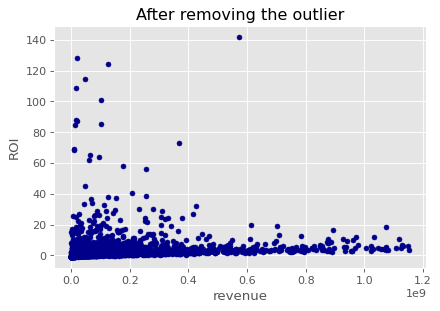

In [128]:
ax1 = u_movie_df.plot.scatter(x ='revenue', y = 'ROI', c='DarkBlue')
plt.title("After removing the outlier")

In [129]:
df_compare = u_movie_df[['revenue', 'ROI']]
df_compare = df_compare.dropna().reset_index()
display(df_compare)

temp_1 =  df_compare[df_compare.revenue >= df_compare.revenue.mean()]
temp_2 =  df_compare[df_compare.revenue < df_compare.revenue.mean()]
temp_1 = temp_1.dropna().reset_index()
temp_2 = temp_2.dropna().reset_index()
temp_1 = temp_1.rename(columns={"ROI": "ROI_1"})
temp_2 = temp_2.rename(columns={"ROI": "ROI_2"})

,index,revenue,ROI
0,0,161834276,3.045857
1,1,144056873,2.601422
2,2,45554533,0.518484
3,3,28780255,3.111465
4,4,106371651,1.575585
...,...,...,...
2783,2783,47019435,1.765849
2784,2784,30763855,2.076386
2785,2785,76706000,2.835300
2786,2786,80648577,1.016214


In [130]:
n = df_compare.shape[0] #num of data
print(n)
boo = []

for i in range(n):
    if(df_compare.revenue.iloc[i] >= df_compare.revenue.mean()):
        boo.append('above')
    else:
        boo.append('below')


df_compare['average'] = boo
    
print('Head of dataset:')
display(df_compare.head())

print("Tail of dataset:")
display(df_compare.tail())

2788
Head of dataset:


,index,revenue,ROI,average
0,0,161834276,3.045857,above
1,1,144056873,2.601422,above
2,2,45554533,0.518484,below
3,3,28780255,3.111465,below
4,4,106371651,1.575585,below


Tail of dataset:


,index,revenue,ROI,average
2783,2783,47019435,1.765849,below
2784,2784,30763855,2.076386,below
2785,2785,76706000,2.835300,below
2786,2786,80648577,1.016214,below
2787,2787,46586903,-0.767065,below


**檢查是否為常態分佈**

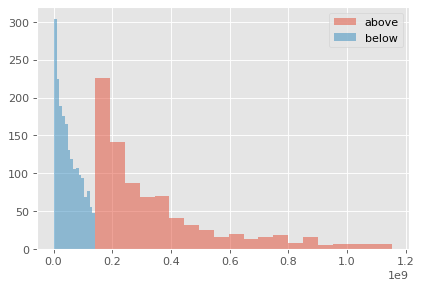

In [131]:
_ = plt.hist(temp_1['revenue'], bins = 'auto', alpha=0.5, label='above')
_ = plt.hist(temp_2['revenue'], bins = 'auto', alpha=0.5, label='below')
plt.legend()
plt.show()

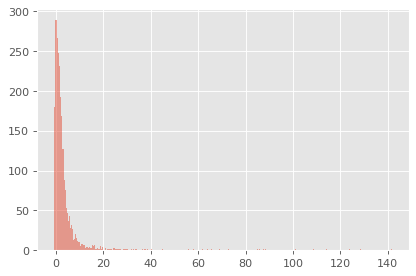

In [132]:
_ = plt.hist(df_compare['ROI'], bins = 'auto', alpha=0.5)
plt.show()

由於資料不是常態分佈，因此我們使用Wilcoxon Rank Sum Test。

**Wilcoxon Signed Rank Sum Test**

$H_0:$ The locations of two populations are the same.<br>
$H_1:$ The location of population 1(Better Revenue) is to the right of the location of population 2 (i.e., population 1 is greater).

In [133]:
df_compare_ = pd.DataFrame([temp_1["ROI_1"], temp_2["ROI_2"]])
df_compare_ = df_compare_.T

In [134]:
stats.wilcoxon(df_compare_['ROI_1'], df_compare_['ROI_2'], alternative='greater')

WilcoxonResult(statistic=271329.0, pvalue=1.0)

**Friedman Test**


Suppose the data are not normally distributed.<br>
$H_0:$ The locations of two populations are the same.<br>
$H_1:$ At least two population locations differ.

In [135]:
friedman_test(df_compare_, 0.05)

cirtical value = 3.841458820694124
Fr =  -10689.0909555442
p-value =  1.0


Wilcoxon signed rank sum test 和 Friedman Test 的p值皆大於$\alpha$。因此我們並不能拒絕虛無假設。<br>
**結論：所以我們可以得知票房較好並不代表ROI較高。**

<div class="alert alert-block alert-info">
<b>🍿 你知道嗎？</b><br>
    
2009年，派拉蒙影業公司發行的《鬼影實錄》是目前投資報酬率最高的電影，僅憑1.1萬美金的製作成本，換回了全球1.97億的票房</div>